### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### Load the Dataset

In [2]:
df=pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Getting information about my data

##### Finding total number of rows and columns

In [3]:
print(df.shape)

(8807, 12)


#### Finding info of the given data

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


##### Finding name of all columns

In [4]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


##### Finding top rows

In [7]:
print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

#### Finding last rows

In [8]:
print(df.head(10))

     show_id     type               title                 director  \
8797   s8798  TV Show           Zak Storm                      NaN   
8798   s8799    Movie            Zed Plus  Chandra Prakash Dwivedi   
8799   s8800    Movie               Zenda           Avadhoot Gupte   
8800   s8801  TV Show  Zindagi Gulzar Hai                      NaN   
8801   s8802    Movie             Zinzana          Majid Al Ansari   
8802   s8803    Movie              Zodiac            David Fincher   
8803   s8804  TV Show         Zombie Dumb                      NaN   
8804   s8805    Movie          Zombieland          Ruben Fleischer   
8805   s8806    Movie                Zoom             Peter Hewitt   
8806   s8807    Movie              Zubaan              Mozez Singh   

                                                   cast  \
8797  Michael Johnston, Jessica Gee-George, Christin...   
8798  Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...   
8799  Santosh Juvekar, Siddharth Chandekar, Sachit P

In [9]:
print(df.sample(n=2))

     show_id     type                 title         director  \
6310   s6311    Movie  Bill Burr: Let It Go  Shannon Hartman   
4623   s4624  TV Show    Skylanders Academy              NaN   

                                                   cast  \
6310                                          Bill Burr   
4623  Justin Long, Ashley Tisdale, Jonathan Banks, C...   

                         country          date_added  release_year rating  \
6310               United States   November 10, 2017          2010     NR   
4623  South Korea, United States  September 28, 2018          2018  TV-Y7   

       duration              listed_in  \
6310     65 min        Stand-Up Comedy   
4623  3 Seasons  Kids' TV, TV Comedies   

                                            description  
6310  The musings of comedian Bill Burr are let loos...  
4623  Travel the vast Skylander universe in this ani...  


##### Describing the data

In [10]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [11]:
print(df.describe().all)

<bound method DataFrame.all of        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000>


In [15]:
print(df["title"].count())

8807


In [17]:
print(df["title"].min())

#Alive


In [25]:
print(df["title"].mode())

0                              #Alive
1       #AnneFrank - Parallel Stories
2                   #FriendButMarried
3                 #FriendButMarried 2
4                               #Roxy
                    ...              
8802                         忍者ハットリくん
8803                             海的儿子
8804                             마녀사냥
8805                          반드시 잡는다
8806              최강전사 미니특공대 : 영웅의 탄생
Name: title, Length: 8807, dtype: object


### Data Preprocessing

##### Missing values

In [30]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(" Missing Values:\n", missing_columns)


 Missing Values:
 director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


##### filling null values

In [5]:
# First, import pandas and create a DataFrame
import pandas as pd

# Create a DataFrame or read it from a file
# Example: Reading from a CSV file
# df = pd.read_csv('your_file.csv')

# Or creating a sample DataFrame for demonstration
df = pd.DataFrame({
    'country': ['USA', None, 'France', 'Japan'],
    'director': ['Spielberg', None, 'Nolan', 'Kurosawa'],
    'cast': ['Actor1', 'Actor2', None, 'Actor4'],
    'rating': [8.5, 7.2, None, 9.0],
    'duration': ['120 min', '90 min', None, '150 min']
})

# Now fill the missing values
df['country'] = df['country'].fillna('UK')
df['director'] = df['director'].fillna('John')
df['cast'] = df['cast'].fillna('Actor3')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('30 min')

# Display the DataFrame
df

,country,director,cast,rating,duration
0,USA,Spielberg,Actor1,8.5,120 min
1,UK,John,Actor2,7.2,90 min
2,France,Nolan,Actor3,7.2,30 min
3,Japan,Kurosawa,Actor4,9.0,150 min


##### Check again after filling

In [37]:

print(" Missing values after cleaning:\n", df.isnull().sum())


 Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [44]:
print("duplicate_values",df.duplicated)
df_no_duplicate=df.drop_duplicates()
print(df_no_duplicate)

duplicate_values <bound method DataFrame.duplicated of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               Unknown  United States   
1     Ama Qamata

In [48]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)

# New features
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

print("Shape after cleaning:", df.shape)
print(df.isnull().sum())

Shape after cleaning: (8709, 16)
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added       0
month_added      0
duration_num     0
duration_type    0
dtype: int64


In [50]:
# Type counts
print(df.groupby("type")['show_id'].count())


type
Movie      6131
TV Show    2578
Name: show_id, dtype: int64


In [51]:
# Top 5 countries
print(df['country'].value_counts().head())

country
United States     2778
India              971
Unknown            827
United Kingdom     403
Japan              241
Name: count, dtype: int64


#### Rating wise

In [52]:

print(df.groupby("rating")['show_id'].count())

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            78
PG           287
PG-13        490
R            799
TV-14       2133
TV-G         212
TV-MA       3187
TV-PG        838
TV-Y         300
TV-Y7        330
TV-Y7-FV       5
UR             3
Name: show_id, dtype: int64


### Aggregation

In [53]:

agg = df.groupby(['type', 'rating']).agg({
    'show_id': 'count',
    'duration_num': 'mean'
}).reset_index()
print(agg.head())

    type  rating  show_id  duration_num
0  Movie  66 min        1      0.000000
1  Movie  74 min        1      0.000000
2  Movie  84 min        1      0.000000
3  Movie       G       41     90.268293
4  Movie   NC-17        3    125.000000


### Merge

In [57]:

platform_df = pd.DataFrame({
    'type': ['Movie', 'TV Show'],
    'platform': ['Netflix', 'Netflix']
})
platform_df

,type,platform
0,Movie,Netflix
1,TV Show,Netflix


In [58]:
merged_df = pd.merge(df, platform_df, on='type', how='left')
merged_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_type,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,min,Netflix
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2.0,Seasons,Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1.0,Season,Netflix
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1.0,Season,Netflix
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2.0,Seasons,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,158.0,min,Netflix
8705,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,2.0,Seasons,Netflix
8706,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,88.0,min,Netflix
8707,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88.0,min,Netflix


In [59]:
merged_df = pd.merge(df, platform_df, on='type', how='right')
merged_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_type,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,min,Netflix
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,91.0,min,Netflix
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125.0,min,Netflix
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,104.0,min,Netflix
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,127.0,min,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,2.0,Seasons,Netflix
8705,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,2.0,Seasons,Netflix
8706,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,3.0,Seasons,Netflix
8707,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,1.0,Season,Netflix


In [60]:
merged_df = pd.merge(df, platform_df, on='type', how='inner')
merged_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_type,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,min,Netflix
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2.0,Seasons,Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1.0,Season,Netflix
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1.0,Season,Netflix
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2.0,Seasons,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,158.0,min,Netflix
8705,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,2.0,Seasons,Netflix
8706,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,88.0,min,Netflix
8707,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88.0,min,Netflix


In [61]:
merged_df = pd.merge(df, platform_df, on='type', how='outer')
merged_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_type,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,min,Netflix
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,91.0,min,Netflix
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125.0,min,Netflix
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,104.0,min,Netflix
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,127.0,min,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,2.0,Seasons,Netflix
8705,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,2.0,Seasons,Netflix
8706,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,3.0,Seasons,Netflix
8707,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,1.0,Season,Netflix


### concatination


In [62]:
# Concat head & tail
concat_df = pd.concat([df.head(2), df.tail(2)])
print(concat_df[['title', 'type']])

                     title     type
0     Dick Johnson Is Dead    Movie
1            Blood & Water  TV Show
8805                  Zoom    Movie
8806                Zubaan    Movie


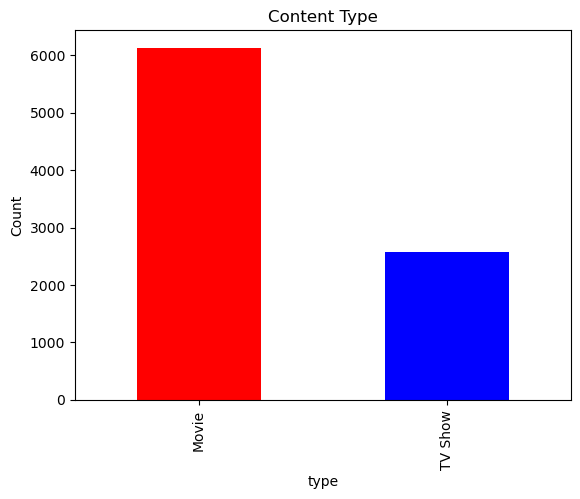

In [63]:
# 1. Type count
df['type'].value_counts().plot(kind='bar', color=['red', 'blue'], title='Content Type')
plt.ylabel("Count")
plt.show()

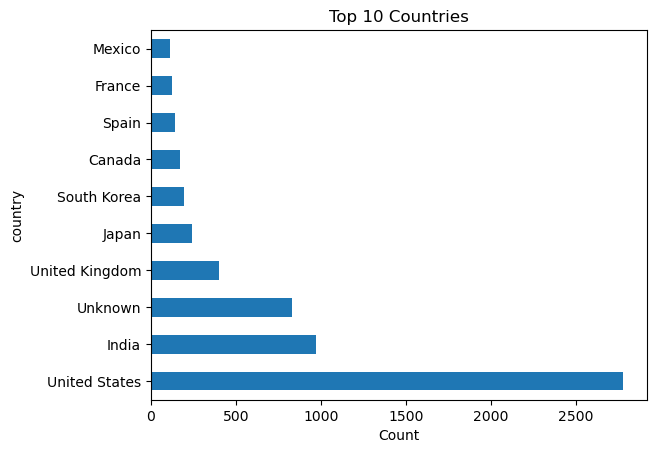

In [64]:
# 2. Country distribution
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries')
plt.xlabel("Count")
plt.show()

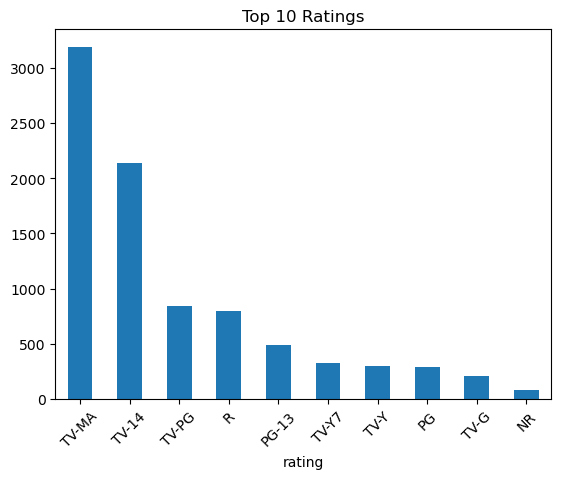

In [65]:
# 3. Ratings
df['rating'].value_counts().head(10).plot(kind='bar', title='Top 10 Ratings')
plt.xticks(rotation=45)
plt.show()

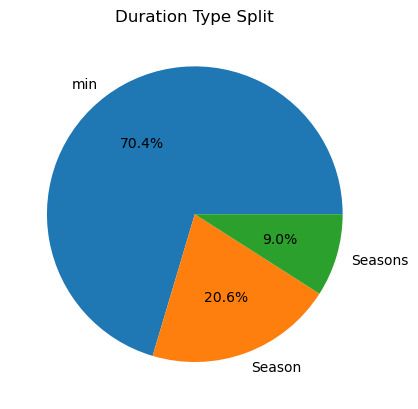

In [66]:
# 4. Duration type
df['duration_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Duration Type Split')
plt.ylabel("")
plt.show()

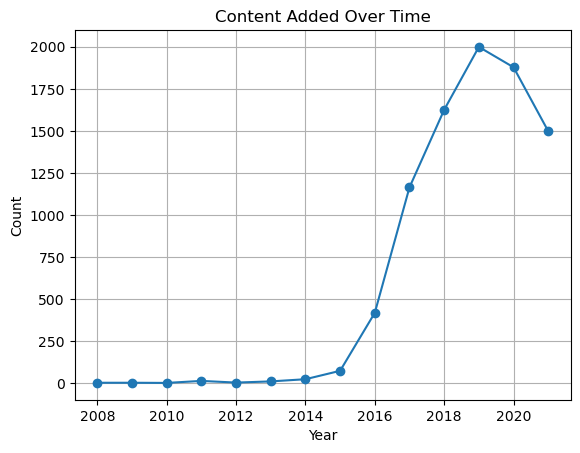

In [67]:
# 5. Content added over years
df['year_added'].value_counts().sort_index().plot(marker='o', title='Content Added Over Time')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [70]:
# Prepare data
model_df = df[['type', 'country', 'release_year', 'rating', 'duration_num']].dropna()
model_df

,type,country,release_year,rating,duration_num
0,Movie,United States,2020,PG-13,90.0
1,TV Show,South Africa,2021,TV-MA,2.0
2,TV Show,Unknown,2021,TV-MA,1.0
3,TV Show,Unknown,2021,TV-MA,1.0
4,TV Show,India,2021,TV-MA,2.0
...,...,...,...,...,...
8802,Movie,United States,2007,R,158.0
8803,TV Show,Unknown,2018,TV-Y7,2.0
8804,Movie,United States,2009,R,88.0
8805,Movie,United States,2006,PG,88.0


In [71]:
# Encoding
model_df['country_enc'] = LabelEncoder().fit_transform(model_df['country'])
model_df['rating_enc'] = LabelEncoder().fit_transform(model_df['rating'])
model_df['type_enc'] = model_df['type'].map({'Movie': 0, 'TV Show': 1})
model_df

,type,country,release_year,rating,duration_num,country_enc,rating_enc,type_enc
0,Movie,United States,2020,PG-13,90.0,600,7,0
1,TV Show,South Africa,2021,TV-MA,2.0,424,11,1
2,TV Show,Unknown,2021,TV-MA,1.0,733,11,1
3,TV Show,Unknown,2021,TV-MA,1.0,733,11,1
4,TV Show,India,2021,TV-MA,2.0,251,11,1
...,...,...,...,...,...,...,...,...
8802,Movie,United States,2007,R,158.0,600,8,0
8803,TV Show,Unknown,2018,TV-Y7,2.0,733,14,1
8804,Movie,United States,2009,R,88.0,600,8,0
8805,Movie,United States,2006,PG,88.0,600,6,0


In [75]:
# Features and label
X = model_df[['country_enc', 'release_year', 'rating_enc', 'duration_num']]
y = model_df['type_enc']

# Print the variables to see their contents
print(X)
print(y)

      country_enc  release_year  rating_enc  duration_num
0             600          2020           7          90.0
1             424          2021          11           2.0
2             733          2021          11           1.0
3             733          2021          11           1.0
4             251          2021          11           2.0
...           ...           ...         ...           ...
8802          600          2007           8         158.0
8803          733          2018          14           2.0
8804          600          2009           8          88.0
8805          600          2006           6          88.0
8806          251          2015           9         111.0

[8709 rows x 4 columns]
0       0
1       1
2       1
3       1
4       1
       ..
8802    0
8803    1
8804    0
8805    0
8806    0
Name: type_enc, Length: 8709, dtype: int64


In [80]:
# Count of each rating
rating_counts = df['rating'].value_counts()
print("Rating Counts:\n", rating_counts)


Rating Counts:
 rating
TV-MA       3187
TV-14       2133
TV-PG        838
R            799
PG-13        490
TV-Y7        330
TV-Y         300
PG           287
TV-G         212
NR            78
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


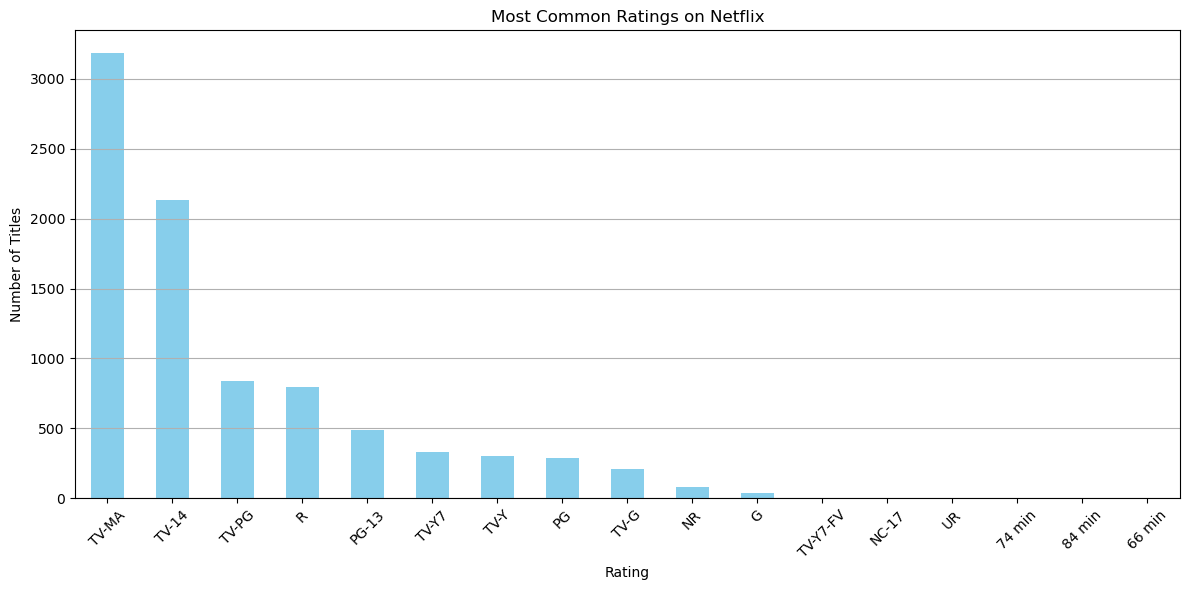

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Most Common Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [82]:
rating_by_type = df.groupby(['type', 'rating']).size().unstack().fillna(0)

print("Rating by Type:\n", rating_by_type)


Rating by Type:
 rating   66 min  74 min  84 min     G  NC-17    NR     PG  PG-13      R  \
type                                                                      
Movie       1.0     1.0     1.0  41.0    3.0  75.0  287.0  490.0  797.0   
TV Show     0.0     0.0     0.0   0.0    0.0   3.0    0.0    0.0    2.0   

rating    TV-14   TV-G   TV-MA  TV-PG   TV-Y  TV-Y7  TV-Y7-FV   UR  
type                                                                
Movie    1427.0  126.0  2064.0  540.0  131.0  139.0       5.0  3.0  
TV Show   706.0   86.0  1123.0  298.0  169.0  191.0       0.0  0.0  


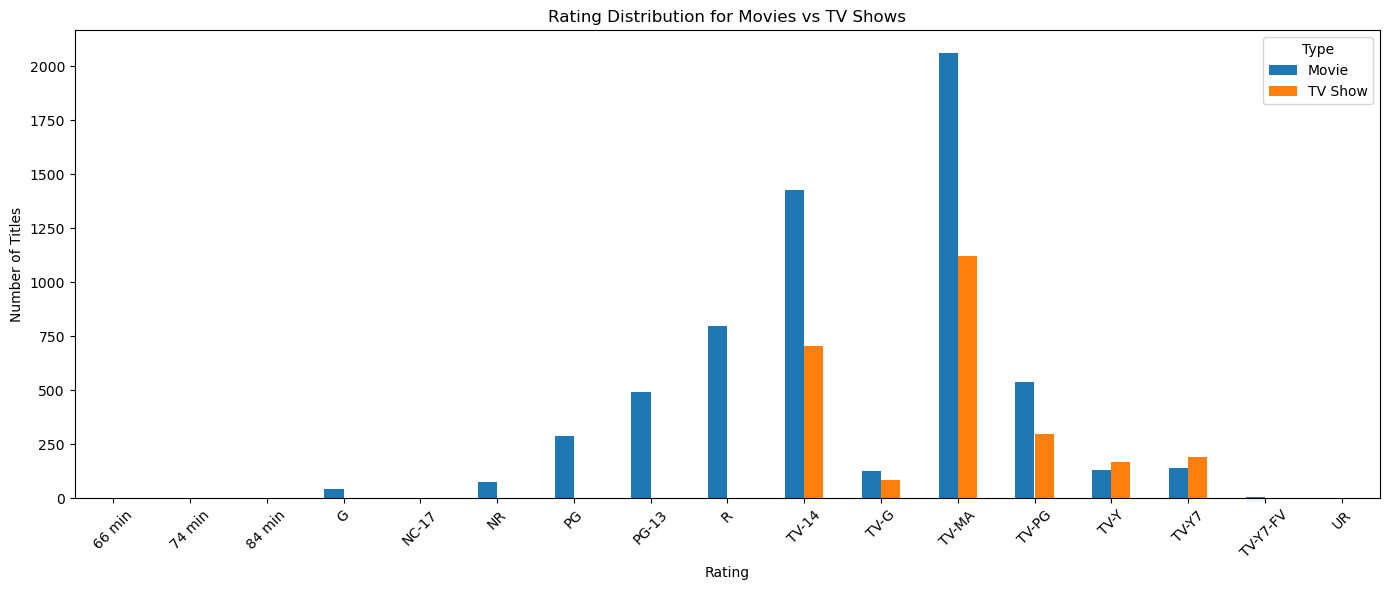

In [83]:
rating_by_type.T.plot(kind='bar', figsize=(14,6))
plt.title("Rating Distribution for Movies vs TV Shows")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


In [84]:
rating_percent = df['rating'].value_counts(normalize=True) * 100
print("Rating Percentage:\n", rating_percent.round(2))


Rating Percentage:
 rating
TV-MA       36.59
TV-14       24.49
TV-PG        9.62
R            9.17
PG-13        5.63
TV-Y7        3.79
TV-Y         3.44
PG           3.30
TV-G         2.43
NR           0.90
G            0.47
TV-Y7-FV     0.06
NC-17        0.03
UR           0.03
74 min       0.01
84 min       0.01
66 min       0.01
Name: proportion, dtype: float64


In [85]:
type_counts = df['type'].value_counts()
print("Content Type Counts:\n", type_counts)


Content Type Counts:
 type
Movie      6131
TV Show    2578
Name: count, dtype: int64


In [86]:
type_counts = df['type'].value_counts()
print("Content Type Counts:\n", type_counts)


Content Type Counts:
 type
Movie      6131
TV Show    2578
Name: count, dtype: int64


In [87]:
year_counts = df['release_year'].value_counts().sort_index()
print("Release Year Counts:\n", year_counts.tail(10))  # latest 10 years


Release Year Counts:
 release_year
2012     229
2013     282
2014     343
2015     549
2016     878
2017    1016
2018    1140
2019    1030
2020     953
2021     592
Name: count, dtype: int64


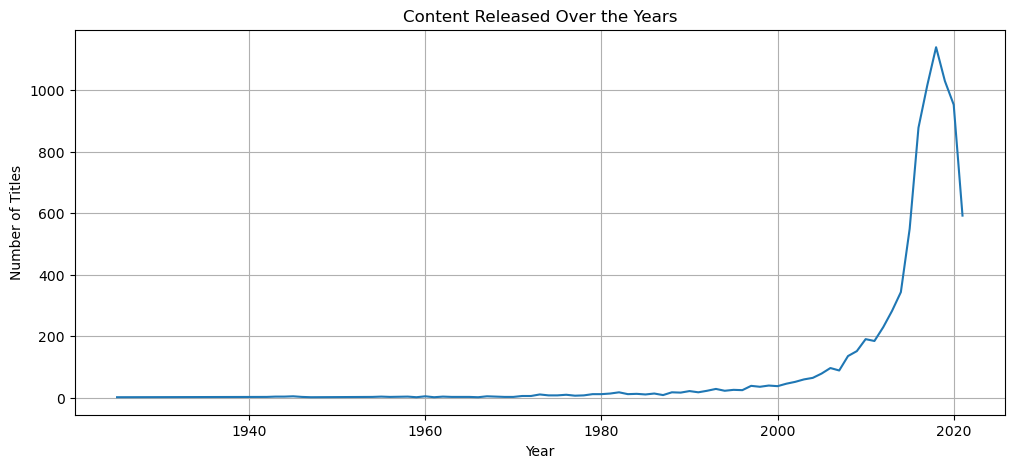

In [88]:
year_counts.plot(kind='line', figsize=(12,5))
plt.title("Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


In [89]:
country_counts = df['country'].value_counts().head(10)
print("Top 10 Countries by Number of Titles:\n", country_counts)


Top 10 Countries by Number of Titles:
 country
United States     2778
India              971
Unknown            827
United Kingdom     403
Japan              241
South Korea        195
Canada             173
Spain              141
France             122
Mexico             110
Name: count, dtype: int64


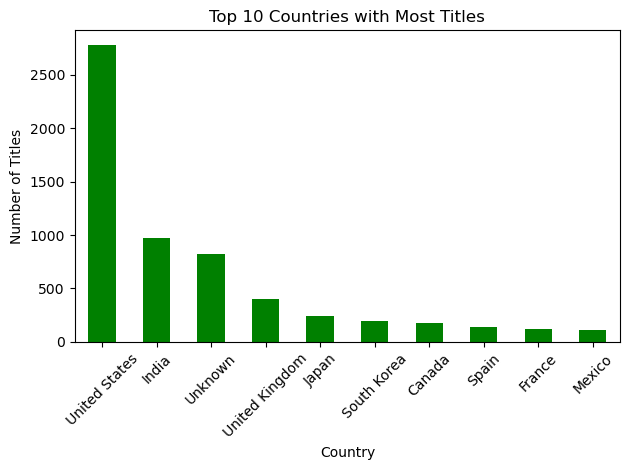

In [90]:
country_counts.plot(kind='bar', color='green')
plt.title("Top 10 Countries with Most Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:
# Split genres and count
genre_series = df['listed_in'].str.split(',').explode().str.strip()
genre_counts = genre_series.value_counts().head(10)
print("Top 10 Genres:\n", genre_counts)


Top 10 Genres:
 listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1328
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


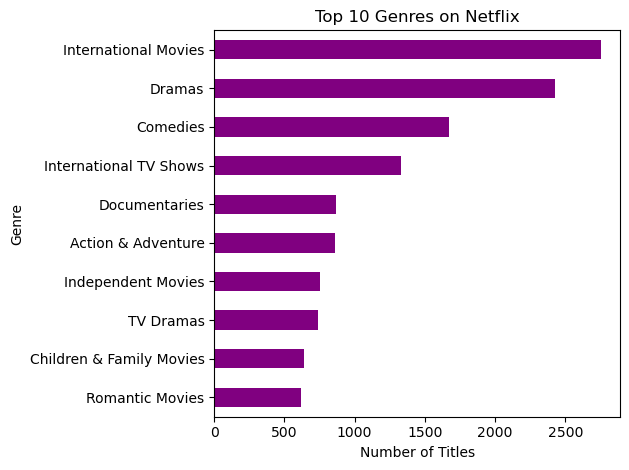

In [92]:
genre_counts.plot(kind='barh', color='purple')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [93]:
top_directors = df['director'].value_counts().head(10)
print("Top 10 Directors:\n", top_directors)


Top 10 Directors:
 director
Unknown                   2541
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


In [101]:
top_countries = df['country'].value_counts().head(5).index
grouped_type_country = df[df['country'].isin(top_countries)].groupby(['country', 'type']).size().unstack()
print(grouped_type_country)


type            Movie  TV Show
country                       
India             893       78
Japan              76      165
United Kingdom    206      197
United States    2058      720
Unknown           440      387


In [104]:
# Consider flops as movies under 40 minutes
short_movies = df[(df['type'] == 'Movie') & (df['duration_num'] <= 40)]
print("Short Duration Movies (Possible Flops):\n", short_movies[['title', 'duration', 'release_year']].head())


Short Duration Movies (Possible Flops):
                            title duration  release_year
45        My Heroes Were Cowboys   23 min          2021
71   A StoryBots Space Adventure   13 min          2021
470  Bridgerton - The Afterparty   39 min          2021
495                    Awon Boyz   38 min          2019
560                      Audible   39 min          2021


In [105]:
# Consider flops as movies under 40 minutes
short_movies = df[(df['type'] == 'Movie') & (df['duration_num'] <= 40)]
print("Short Duration Movies (Possible Flops):\n", short_movies[['title', 'duration', 'release_year']].head())


Short Duration Movies (Possible Flops):
                            title duration  release_year
45        My Heroes Were Cowboys   23 min          2021
71   A StoryBots Space Adventure   13 min          2021
470  Bridgerton - The Afterparty   39 min          2021
495                    Awon Boyz   38 min          2019
560                      Audible   39 min          2021


In [106]:
rare_ratings = ['UR', 'NR', 'Not Rated', 'UNRATED']
rare_rating_movies = df[(df['type'] == 'Movie') & (df['rating'].isin(rare_ratings))]
print("Movies with Rare Ratings (Possible Low Engagement):\n", rare_rating_movies[['title', 'rating']].head())


Movies with Rare Ratings (Possible Low Engagement):
                            title rating
5971                    (T)ERROR     NR
5987                  13 Cameras     NR
6015                 4th Man Out     NR
6054  A Russell Peters Christmas     NR
6087            Act of Vengeance     NR


In [107]:
rare_countries = df['country'].value_counts().tail(10).index
rare_country_movies = df[(df['type'] == 'Movie') & (df['country'].isin(rare_countries))]
print("Movies from Less-Common Countries:\n", rare_country_movies[['title', 'country']].head())


Movies from Less-Common Countries:
                 title                                            country
3101             MFKZ                                      France, Japan
3125  The Danish Girl  United Kingdom, United States, Germany, Denmar...
3158  The Sky Is Pink       India, United Kingdom, Canada, United States
3191        Dead Kids                         Philippines, United States
3203          Why Me?                         Romania, Bulgaria, Hungary


In [108]:
# Combine all "flop-like" indicators
flops = df[
    (df['type'] == 'Movie') &
    (df['duration_num'] <= 40) &
    (df['director'] == 'Unknown') &
    (df['cast'] == 'Unknown') &
    (df['rating'].isin(rare_ratings))
]

print("Combined Flop-Like Movies Ranking:\n", flops[['title', 'release_year', 'duration', 'rating']].head(10))
print("Total Possible Flops Found:", flops.shape[0])


Combined Flop-Like Movies Ranking:
 Empty DataFrame
Columns: [title, release_year, duration, rating]
Index: []
Total Possible Flops Found: 0


In [109]:
tv_flops = df[(df['type'] == 'TV Show') & (df['duration_num'] <= 1)]
print("TV Shows with Only 1 Season:\n", tv_flops[['title', 'duration', 'release_year']].head())


TV Shows with Only 1 Season:
                                   title  duration  release_year
2                             Ganglands  1 Season          2021
3                 Jailbirds New Orleans  1 Season          2021
5                         Midnight Mass  1 Season          2021
10  Vendetta: Truth, Lies and The Mafia  1 Season          2021
11                     Bangkok Breaking  1 Season          2021
